# Rekomendasi Hotel Terbaik di Eropa

### Data Source

Data yang digunakan bersumber dari situs Booking.com yang diakses melalui kaggle. Semua data dalam file sudah tersedia untuk umum bagi semua orang. __[Unduh]__ (https://drive.google.com/open?id=1GdbBCMtLCwRYvsOrqBODcaOq9BfDGG8z)

Dataset ini terdiri dari 515.738 review pelanggan dan score terhadap 1492 hotel mewah di Eropa. 
Terdapat 17 features dari dataset ini, yaitu:
1. Hotel_Address: Address of hotel.
2. Review_Date: Date when reviewer posted the corresponding review.
3. Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
4. Hotel_Name: Name of Hotel
5. Reviewer_Nationality: Nationality of Reviewer
6. Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
7. Review_Total_Negative_Word_Counts: Total number of words in the negative review.
8. Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
9. Review_Total_Positive_Word_Counts: Total number of words in the positive review.
10. Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
11. Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.
12. Total_Number_of_Reviews: Total number of valid reviews the hotel has.
13. Tags: Tags reviewer gave the hotel.
14. days_since_review: Duration between the review date and scrape date.
15. Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This  number indicates how many valid scores without review in there.
16. lat: Latitude of the hotel
17. lng: longtitude of the hotel

### 1. Load Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Hotel_Reviews.csv")

In [3]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### 2.  Data Introduction

In [4]:
data.shape

(515738, 17)

In [5]:
for i in data.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


In [6]:
len(data["Hotel_Name"].unique())

1492

### 3. Data Cleaning

In [7]:
#Menghapus duplikasi reviews dari dataset
print(sum(data.duplicated()))
data = data.drop_duplicates()
print('After removing Duplicates: {}'.format(data.shape))

526
After removing Duplicates: (515212, 17)


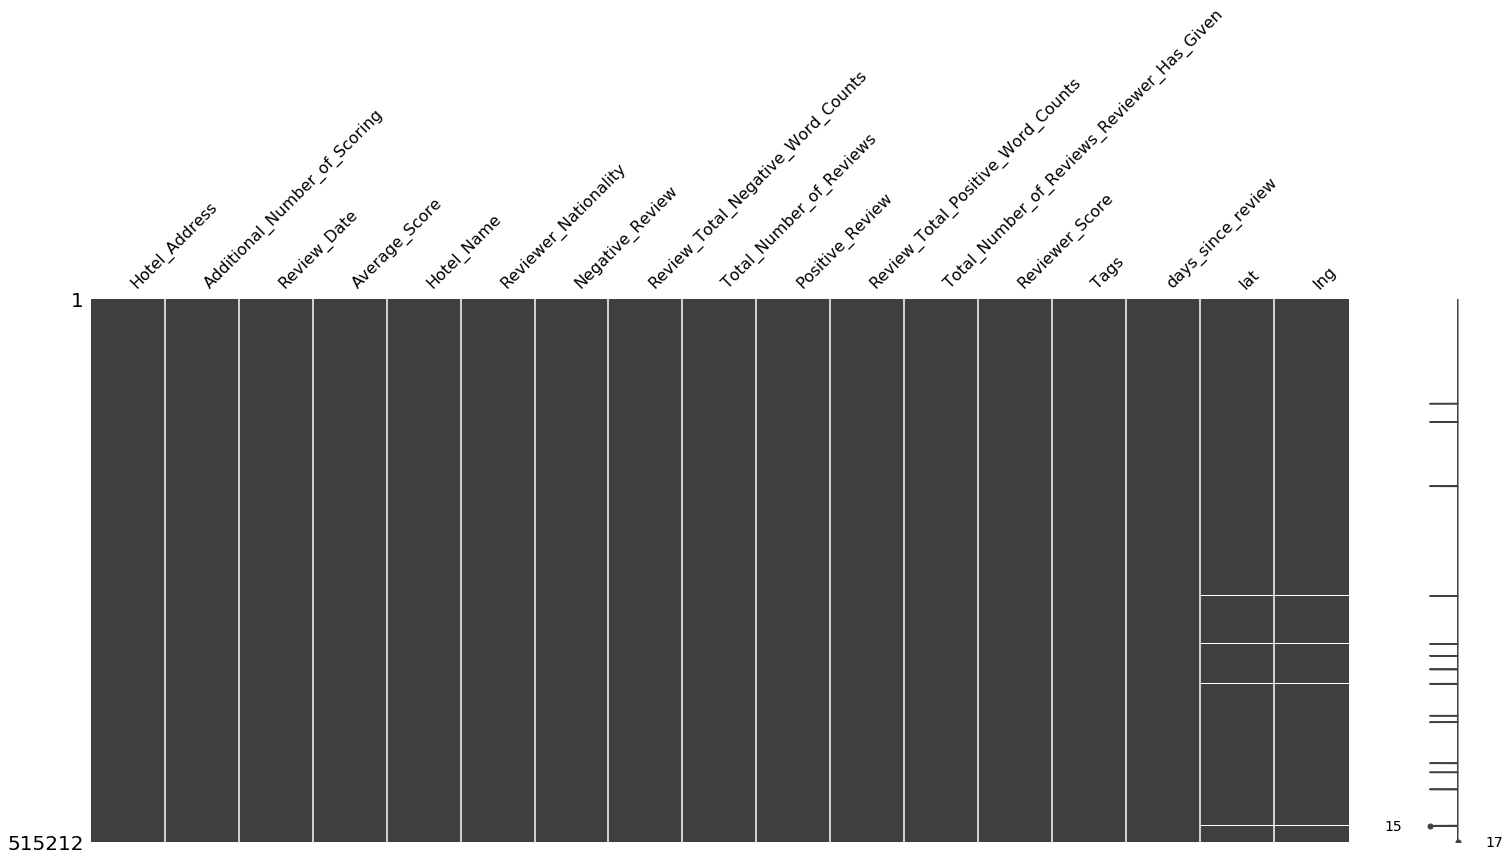

In [8]:
#Mencari missing values dalam dataset
import missingno as msno
msno.matrix(data)

Terdapat beberapa missing values pada kolom lat (latitude) dan lng (longitude)

In [9]:
nan = lambda data: data[data.isnull().any(axis=1)]
nan_data = nan(data)
nan_data = nan_data[['Hotel_Name','lat','lng']]
print('Number of missing values in the dataset: {}'.format(len(nan_data)))

Number of missing values in the dataset: 3268


In [10]:
nan_data.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

Ada 3268 NaN (missing values) yang terdapat pada 17 hotel (1,13% dari total hotel) 

In [11]:
#Mencari hotel yang memiliki missing values
nan_data.Hotel_Name.value_counts()

Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: Hotel_Name, dtype: int64

Mengisi missing values pada kolom lat dan lng pada 17 hotel tersebut melalui informasi pada kolom Hotel_Address.

In [12]:
print('No of reviews in the dataset to that Hotel:')
print('Fleming s Selection Hotel Wien City: {}'.format(len(data.loc[data.Hotel_Name == 'Fleming s Selection Hotel Wien City'])))
print('Hotel City Central: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel City Central'])))
print('Hotel Atlanta: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel Atlanta'])))
print('Maison Albar Hotel Paris Op ra Diamond: {}'.format(len(data.loc[data.Hotel_Name == 'Maison Albar Hotel Paris Op ra Diamond'])))
print('Hotel Daniel Vienna: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel Daniel Vienna'])))
print('Hotel Pension Baron am Schottentor: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel Pension Baron am Schottentor'])))
print('Austria Trend Hotel Schloss Wilhelminenberg Wien: {}'.format(len(data.loc[data.Hotel_Name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'])))
print('Derag Livinghotel Kaiser Franz Joseph Vienna: {}'.format(len(data.loc[data.Hotel_Name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'])))
print('NH Collection Barcelona Podium: {}'.format(len(data.loc[data.Hotel_Name == 'NH Collection Barcelona Podium'])))
print('City Hotel Deutschmeister: {}'.format(len(data.loc[data.Hotel_Name == 'City Hotel Deutschmeister'])))
print('Hotel Park Villa: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel Park Villa'])))
print('Cordial Theaterhotel Wien: {}'.format(len(data.loc[data.Hotel_Name == 'Cordial Theaterhotel Wien'])))
print('Holiday Inn Paris Montmartre: {}'.format(len(data.loc[data.Hotel_Name == 'Holiday Inn Paris Montmartre'])))
print('Roomz Vienna: {}'.format(len(data.loc[data.Hotel_Name == 'Roomz Vienna'])))
print('Mercure Paris Gare Montparnasse: {}'.format(len(data.loc[data.Hotel_Name == 'Mercure Paris Gare Montparnasse'])))
print('Renaissance Barcelona Hotel: {}'.format(len(data.loc[data.Hotel_Name == 'Renaissance Barcelona Hotel'])))
print('Hotel Advance: {}'.format(len(data.loc[data.Hotel_Name == 'Hotel Advance'])))

No of reviews in the dataset to that Hotel:
Fleming s Selection Hotel Wien City: 658
Hotel City Central: 563
Hotel Atlanta: 389
Maison Albar Hotel Paris Op ra Diamond: 290
Hotel Daniel Vienna: 245
Hotel Pension Baron am Schottentor: 223
Austria Trend Hotel Schloss Wilhelminenberg Wien: 194
Derag Livinghotel Kaiser Franz Joseph Vienna: 147
NH Collection Barcelona Podium: 146
City Hotel Deutschmeister: 93
Hotel Park Villa: 61
Cordial Theaterhotel Wien: 57
Holiday Inn Paris Montmartre: 55
Roomz Vienna: 49
Mercure Paris Gare Montparnasse: 37
Renaissance Barcelona Hotel: 33
Hotel Advance: 28


Mengisi missing values pada kolom lat dan lng secara manual. 
Untuk mengisi lat, lng Hotel dapat menggunakan informasi pada situs ini [http://latlong.org/]

In [13]:
#Input manual lat hotel
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

In [14]:
#Input manual lng hotel
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

In [15]:
#Menambahkan lat hotel ke dalam kolom lat
data['lat'] = data['lat'].fillna(data['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#Menambahkan lng hotel ke dalam kolom lng
data['lng'] = data['lng'].fillna(data['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

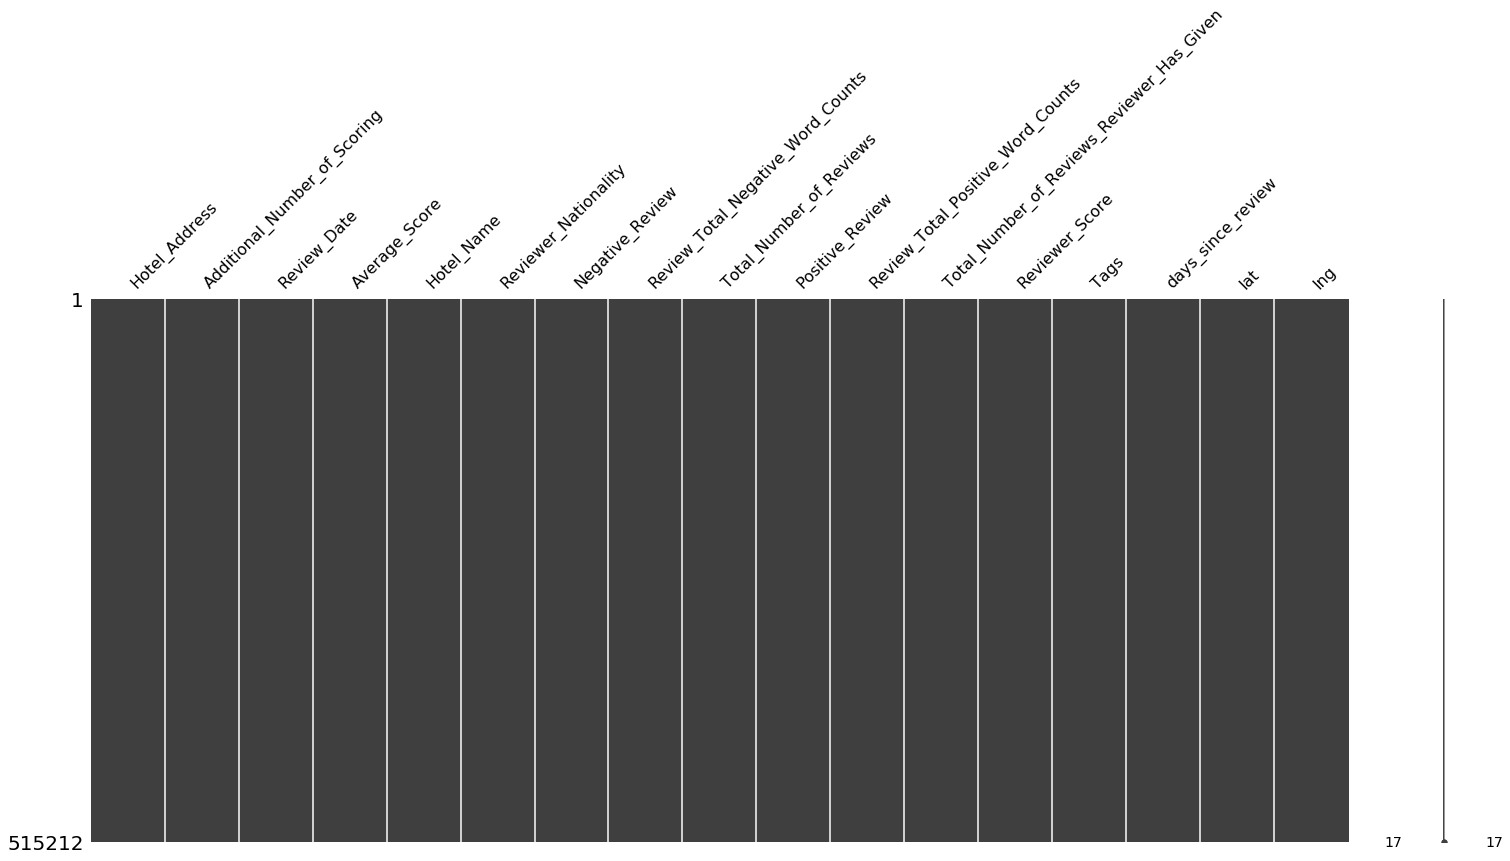

In [16]:
msno.matrix(data)

In [17]:
#Menyimpan data ke dalam file pickle
data.to_pickle('Clean_Data')